In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
%matplotlib inline
from pywaffle import Waffle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [2]:
#loading the three datasets
features=pd.read_csv('features.csv')
sales=pd.read_csv('sales.csv')
stores=pd.read_csv('stores.csv')

## 1. Checking content of the datasets
#### features dataset

In [3]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
print('The dataset contains (rows, columns):', features.shape)

The dataset contains (rows, columns): (8190, 12)


In [5]:
#summary of the features dataframe
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [6]:
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


Observations: multiple variables contain missing values; date is not in datetime format

In [7]:
#converting date to datetime format
features['Date']=pd.to_datetime(features['Date'], format='%d/%m/%Y')
#features['Date'].astype('int64').dtypes
features['Date'].dtypes

dtype('<M8[ns]')

In [8]:
features.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

#### stores dataset

In [9]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [10]:
print('The dataset contains (rows, columns):', stores.shape)

The dataset contains (rows, columns): (45, 3)


In [11]:
#summary of the stores dataframe
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [12]:
#basic statistics of the stores variables
stores.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [13]:
#number of unique values in each variable
stores.nunique()

Store    45
Type      3
Size     40
dtype: int64

In [14]:
#What are the three types of stores?
#How many stores of each type the company has?
stores['Type'].value_counts()

A    22
B    17
C     6
Name: Type, dtype: int64

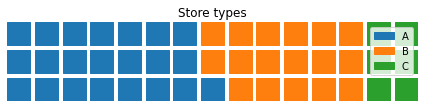

In [15]:
waffle = plt.figure(FigureClass=Waffle, rows=3, columns=15, 
    values=stores['Type'].value_counts(), labels=list(stores['Type'].unique()), title={'label': 'Store types'}, cmap_name="tab10")  
#waffle.show()

In [16]:
#What is the size of each type of store?
stores.groupby('Type')['Size'].mean()

Type
A    177247.727273
B    101190.705882
C     40541.666667
Name: Size, dtype: float64

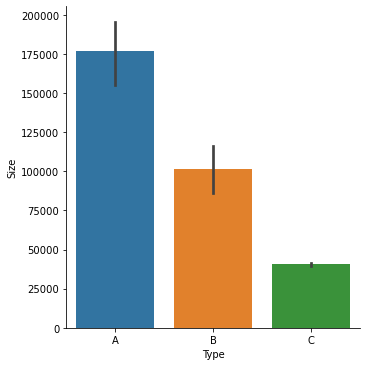

In [17]:
#Average size of each type of stores
sns.catplot(x='Type', y='Size', data=stores, kind='bar')
plt.show()

#### Observations: 

There are 45 stores in the company. There are 3 types of stores: A, B and C. Type A stores are the largest, type C stores are the smallest. Most of the stores are Type A (the largest). There are only 6 Type C stores (the smallest).

#### Sales dataset

In [18]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [19]:
print('The dataset contains (rows, columns):', sales.shape)

The dataset contains (rows, columns): (421570, 5)


In [20]:
#summary of the sales dataframe
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [21]:
#converting date to daytime format
sales['Date']=pd.to_datetime(sales['Date'], format='%d/%m/%Y')
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [22]:
sales.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [23]:
sales[['Dept', 'Store']].nunique()

Dept     81
Store    45
dtype: int64

Observation: 45 stores have 99 departments, some department numbers are not in the dataset. Stores can have several departments.

## 2. Making data modifications
#### Merging all the datasets

In [24]:
#sales dataset in the most important, since it contains Weekly sales data, which will be forecasted. So, other datasets are added to sales dataset.
sales_full=pd.merge(sales, stores, on='Store', how='left').merge(features, on=['Store','Date'], how='left')
sales_full

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,False
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,False
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,False


#### Dealing with missing values

In [25]:
#checking for missing values in the merged dataset
sales_full.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
dtype: int64

In [26]:
#filling Markdown missing values with 0 (no Markdown that week)
sales_full[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']]=sales_full[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].fillna(value = 0)
sales_full.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday_x     0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday_y     0
dtype: int64

#### Creating new columns

In [27]:
sales_full=sales_full.rename(columns={'IsHoliday_x':'IsHoliday'})

In [28]:
#changing type of IsHoliday variable from boolean to numeric: 0-no Holiday, 1-is Holiday
sales_full['IsHoliday']=sales_full['IsHoliday'].astype(int)
sales_full[['IsHoliday']].info()
#sales_full

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 1 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   IsHoliday  421570 non-null  int32
dtypes: int32(1)
memory usage: 4.8 MB


In [29]:
#sales_full.to_csv('Sales_full.csv')

In [30]:
#creating new Markdown columns, where 0-no Markdown, 1-Markdown
sales_full['MarkDown1_Cat']=sales_full['MarkDown1'].apply(lambda x: 0 if x==0 else 1)
sales_full['MarkDown2_Cat']=sales_full['MarkDown2'].apply(lambda x: 0 if x==0 else 1)
sales_full['MarkDown3_Cat']=sales_full['MarkDown3'].apply(lambda x: 0 if x==0 else 1)
sales_full['MarkDown4_Cat']=sales_full['MarkDown4'].apply(lambda x: 0 if x==0 else 1)
sales_full['MarkDown5_Cat']=sales_full['MarkDown5'].apply(lambda x: 0 if x==0 else 1)
sales_full['MarkDown1_Cat'].value_counts()

0    270889
1    150681
Name: MarkDown1_Cat, dtype: int64

In [31]:
#creating new date columns with month and week number of the year
sales_full['Year']=pd.DatetimeIndex(sales_full['Date']).year
sales_full['Month']=pd.DatetimeIndex(sales_full['Date']).month
sales_full['Week_No']=pd.DatetimeIndex(sales_full['Date']).week
sales_full

<ipython-input-31-e9c6b59c98d5>:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  sales_full['Week_No']=pd.DatetimeIndex(sales_full['Date']).week


,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,...,Unemployment,IsHoliday_y,MarkDown1_Cat,MarkDown2_Cat,MarkDown3_Cat,MarkDown4_Cat,MarkDown5_Cat,Year,Month,Week_No
0,1,1,2010-02-05,24924.50,0,A,151315,42.31,2.572,0.00,...,8.106,False,0,0,0,0,0,2010,2,5
1,1,1,2010-02-12,46039.49,1,A,151315,38.51,2.548,0.00,...,8.106,True,0,0,0,0,0,2010,2,6
2,1,1,2010-02-19,41595.55,0,A,151315,39.93,2.514,0.00,...,8.106,False,0,0,0,0,0,2010,2,7
3,1,1,2010-02-26,19403.54,0,A,151315,46.63,2.561,0.00,...,8.106,False,0,0,0,0,0,2010,2,8
4,1,1,2010-03-05,21827.90,0,A,151315,46.50,2.625,0.00,...,8.106,False,0,0,0,0,0,2010,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,0,B,118221,64.88,3.997,4556.61,...,8.684,False,1,1,1,1,1,2012,9,39
421566,45,98,2012-10-05,628.10,0,B,118221,64.89,3.985,5046.74,...,8.667,False,1,0,1,1,1,2012,10,40
421567,45,98,2012-10-12,1061.02,0,B,118221,54.47,4.000,1956.28,...,8.667,False,1,0,1,1,1,2012,10,41
421568,45,98,2012-10-19,760.01,0,B,118221,56.47,3.969,2004.02,...,8.667,False,1,0,1,1,1,2012,10,42


# 2. Analyzing sales trends

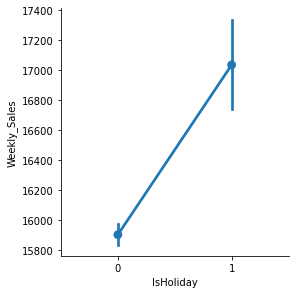

In [32]:
#compare sales on holidays and regular days
sns.catplot(x="IsHoliday",y="Weekly_Sales",data=sales_full, kind="point", height=4) #estimator=np.median
plt.show()

#### Observation:

We can see some (approx from 16000 to 17000) increase in sales on holidays. It seems that the fluctuation on holiday sales is bigger than in sales on regular days.

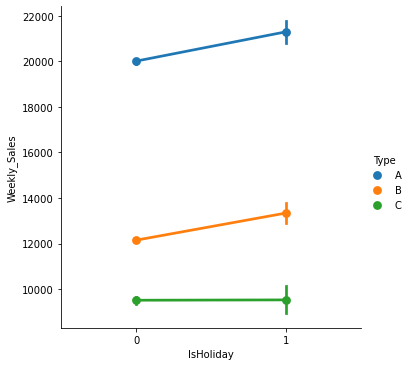

In [33]:
#compare sales on holidays and regular days
sns.catplot(x="IsHoliday",y="Weekly_Sales",data=sales_full, hue="Type",kind="point")
plt.show()

Type A and Type B stores (the largest stores) sell more on Holidays than on regular days; Holidays seem not to increase sales of Type C stores.

In [34]:
#Stores ordered my mean sales from highest to lowest
sales_full.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False)

Store
20    29508.301592
4     29161.210415
14    28784.851727
13    27355.136891
2     26898.070031
10    26332.303819
27    24826.984536
6     21913.243624
1     21710.543621
39    21000.763562
19    20362.126734
23    19776.180881
31    19681.907464
11    19276.762751
24    18969.106500
28    18714.889803
41    17976.004648
32    16351.621855
18    15733.313136
22    15181.218886
12    14867.308619
26    14554.129672
35    13803.596986
40    13763.632803
34    13522.081671
43    13415.114118
8     13133.014768
17    12954.393636
45    11662.897315
42    11443.370118
21    11283.435496
25    10308.157810
37    10297.355026
15     9002.493073
9      8772.890379
30     8764.237719
36     8584.412563
7      8358.766148
29     8158.810609
16     7863.224124
38     7492.478460
3      6373.033983
44     6038.929814
33     5728.414053
5      5053.415813
Name: Weekly_Sales, dtype: float64

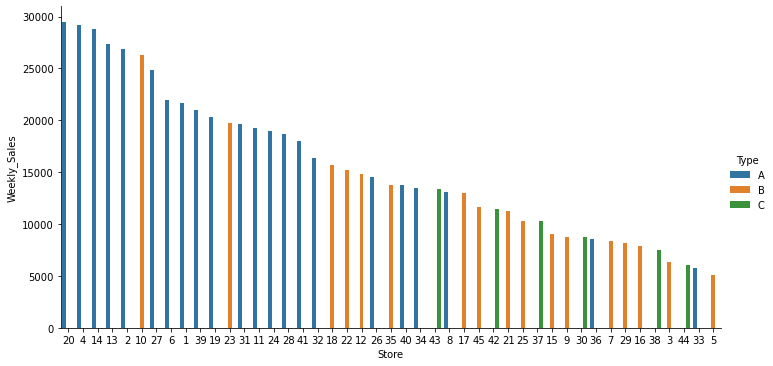

In [35]:
#mean sales of each store
plot_order=sales_full.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False).index.values
sns.catplot(x="Store", y="Weekly_Sales", data=sales_full, kind='bar', hue='Type', order=plot_order,
            ci=None, height=5, aspect=2/1) #estimator= np.median,
plt.show() 

In [36]:
#what is the mean and st.dev of weekly sales?
print("Mean of weekly sales over the three years: ", round(sales_full['Weekly_Sales'].mean(),2))
print("Standard deviation of weekly sales: ", round(sales_full['Weekly_Sales'].std(),2))
print("High above average: ", round(sales_full['Weekly_Sales'].mean(),2)+round(sales_full['Weekly_Sales'].std(),2))

Mean of weekly sales over the three years:  15981.26
Standard deviation of weekly sales:  22711.18
High above average:  38692.44


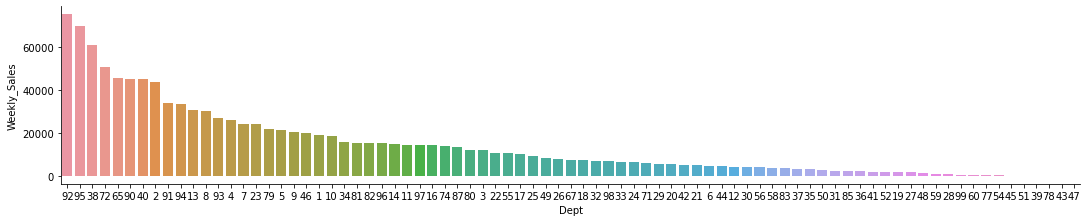

In [37]:
#mean sales in each department
dept_order=sales_full.groupby('Dept')['Weekly_Sales'].mean().sort_values(ascending=False).index.values
sns.catplot(x="Dept", y="Weekly_Sales", data=sales_full, kind='bar', order=dept_order, ci=None, height=3, aspect=5/1)
plt.show()

In [38]:
sales_full.groupby('Dept')['Weekly_Sales'].mean().sort_values(ascending=False)

Dept
92    75204.870531
95    69824.423080
38    61090.619568
72    50566.515417
65    45441.706224
          ...     
51       21.931729
39       11.123750
78        7.296638
43        1.193333
47       -7.682554
Name: Weekly_Sales, Length: 81, dtype: float64

#### Observations:

There are big variation of sales in general. Top five selling stores: 20, 4, 14, 13, 2. They sell above average, but not exceptional. However, they are the most valuable. They are all Type A stores. Store 5 has lowest sales. It would be good to examine more information about these stores.

Departments 92, 95, 38, 72 and 65 are the top best selling departments. They sell way above average of company's weekly sales. We do not know what products they sell. It is recommended to examine those departments in detail. 

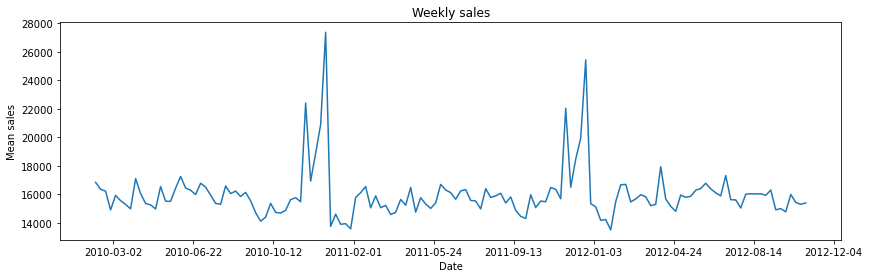

In [41]:
fig, ax=plt.subplots(figsize=(14,4))
ax.plot(sales_full.groupby('Date')['Weekly_Sales'].mean()) 
ax.set(title='Weekly sales', ylabel='Mean sales', xlabel="Date")
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=16))
plt.show()

#### Observations: 

We see the same regularity in sales every year. There are spikes in sales around the same time in 2010/2011 and 2011/2012: sales increase around Christmas/New year period. 

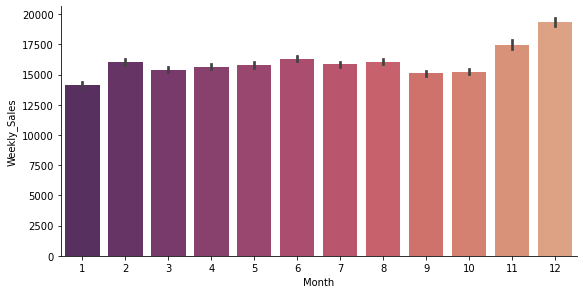

In [42]:
#Zooming in months (averaging accross 3 years, since they follow the same pattern of sales)
sns.catplot(x="Month", y="Weekly_Sales", data=sales_full, kind='bar', height=4, aspect=2/1, palette='flare_r')
plt.show()

Increase in sales is in November and December

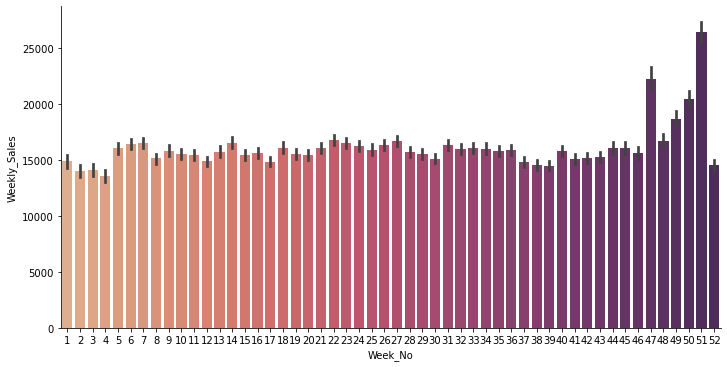

In [43]:
#zooming in weeks
sns.catplot(x="Week_No", y="Weekly_Sales", data=sales_full, kind='bar', height=5, aspect=2/1, palette='flare')
plt.show()

Spikes in sales are on week 47 and week 51. Week 47 is the third week of November (in 2010, 2011, 2012 it was between Nov22, 21, 19 and Nov28, 27, 25th respectfully). These are the weeks with Thanksgiving and Black Friday which comes on a Friday after Thanksgiving. Week 51 is a week before Christmas.

In [44]:
#New dichotomous variables (columns) have been created. They represent week47 and week51: November holiday and Christmas. 
sales_full['Nov_Holiday']=sales_full['Week_No'].apply(lambda x: 1 if x==47 else 0)
sales_full['Before_XMas']=sales_full['Week_No'].apply(lambda x: 1 if x==51 else 0)
sales_full['Nov_Dec']=sales_full['Month'].apply(lambda x: 1 if (x== 11) or (x==12) else 0)
sales_full

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,...,MarkDown2_Cat,MarkDown3_Cat,MarkDown4_Cat,MarkDown5_Cat,Year,Month,Week_No,Nov_Holiday,Before_XMas,Nov_Dec
0,1,1,2010-02-05,24924.50,0,A,151315,42.31,2.572,0.00,...,0,0,0,0,2010,2,5,0,0,0
1,1,1,2010-02-12,46039.49,1,A,151315,38.51,2.548,0.00,...,0,0,0,0,2010,2,6,0,0,0
2,1,1,2010-02-19,41595.55,0,A,151315,39.93,2.514,0.00,...,0,0,0,0,2010,2,7,0,0,0
3,1,1,2010-02-26,19403.54,0,A,151315,46.63,2.561,0.00,...,0,0,0,0,2010,2,8,0,0,0
4,1,1,2010-03-05,21827.90,0,A,151315,46.50,2.625,0.00,...,0,0,0,0,2010,3,9,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,0,B,118221,64.88,3.997,4556.61,...,1,1,1,1,2012,9,39,0,0,0
421566,45,98,2012-10-05,628.10,0,B,118221,64.89,3.985,5046.74,...,0,1,1,1,2012,10,40,0,0,0
421567,45,98,2012-10-12,1061.02,0,B,118221,54.47,4.000,1956.28,...,0,1,1,1,2012,10,41,0,0,0
421568,45,98,2012-10-19,760.01,0,B,118221,56.47,3.969,2004.02,...,0,1,1,1,2012,10,42,0,0,0


In [45]:
sales_full.groupby(['Year','Month'])[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].mean()

MarkDown1    MarkDown2     MarkDown3     MarkDown4    MarkDown5
Year Month                                                                    
2010 2          0.000000     0.000000      0.000000      0.000000     0.000000
     3          0.000000     0.000000      0.000000      0.000000     0.000000
     4          0.000000     0.000000      0.000000      0.000000     0.000000
     5          0.000000     0.000000      0.000000      0.000000     0.000000
     6          0.000000     0.000000      0.000000      0.000000     0.000000
     7          0.000000     0.000000      0.000000      0.000000     0.000000
     8          0.000000     0.000000      0.000000      0.000000     0.000000
     9          0.000000     0.000000      0.000000      0.000000     0.000000
     10         0.000000     0.000000      0.000000      0.000000     0.000000
     11         0.000000     0.000000      0.000000      0.000000     0.000000
     12         0.000000     0.000000      0.000000      0.000000     0.000000
2011 1          0.000000     0.000000      0.000000      0.000000     0.000000
     2          0.000000     0.000000      0.000000      0.000000     0.000000
     3          0.000000     0.000000      0.000000      0.000000     0.000000
     4          0.000000     0.000000      0.000000      0.000000     0.000000
     5          0.000000     0.000000      0.000000      0.000000     0.000000
     6          0.000000     0.000000      0.000000      0.000000     0.000000
     7          0.000000     0.000000      0.000000      0.000000     0.000000
     8          0.000000     0.000000      0.000000      0.000000     0.000000
     9          0.000000     0.000000      0.000000      0.000000     0.000000
     10         0.000000     0.000000      0.000000      0.000000     0.000000
     11      4569.874684  2617.972517  14539.805183   1099.340067  3186.253287
     12      3526.958973  8388.675885   1188.401548   1272.176445  7674.676492
2012 1       3107.310351  9387.106997     84.328678    580.776737  3650.675307
     2      17646.955207  5457.492572     61.974484  12370.745768  6054.921015
     3       8563.062598   512.395119      9.362093   3757.039415  3349.973263
     4       5475.746422  1957.587091     25.596249   1184.963650  3541.514616
     5       8679.060858    17.349179    156.338369   2119.483701  3286.248806
     6       6348.146315   194.659728     47.796395   1594.630360  5043.188706
     7       5026.936910   130.191818     26.658442   3275.699393  5810.078083
     8      11042.494693    76.736650     39.040906   5450.162747  3719.516416
     9       7122.108410    27.199585     37.110495   1585.007636  5094.021625
     10      3462.360351    17.136858     28.883667   1108.364184  3612.054332

## Relationships between sales and other variables

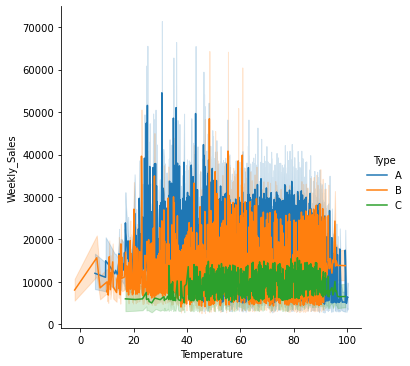

In [46]:
#relationship between temperature and sales
sns.relplot(x="Temperature", y="Weekly_Sales", data=sales_full, kind="line", hue="Type")
plt.show()

#### Observation:

It seems that the temperature affects the sales, but not in a linear way. Lowest sales on very cold and hot weeks; highest sales around the temperatures of 40-60 degrees (-7 to 16 celsius). Applies mostly for bigger stores (Type A). Smaller store sales (Type C) seem not to be affected by changes in temperature.

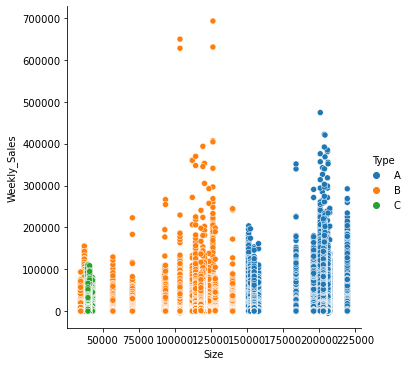

In [47]:
#relationship between the size of the stores and sales.
sns.relplot(x="Size", y="Weekly_Sales", data=sales_full, kind="scatter", hue="Type")
plt.show()

Observation: there is a tendency of positive relationship - sales increase as the store size increases. There are stores that sold much more than others. It is recommended to analyze those sales (over 60000) in detail.

In [48]:
high_sales=sales_full[sales_full['Weekly_Sales']>60000]
high_sales

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,...,MarkDown2_Cat,MarkDown3_Cat,MarkDown4_Cat,MarkDown5_Cat,Year,Month,Week_No,Nov_Holiday,Before_XMas,Nov_Dec
241,1,2,2011-12-23,65615.36,0,A,151315,47.96,3.112,2725.36,...,1,1,1,1,2011,12,51,0,1,1
614,1,5,2010-11-26,70158.86,1,A,151315,64.52,2.735,0.00,...,0,0,0,0,2010,11,47,1,0,1
618,1,5,2010-12-24,85676.09,0,A,151315,52.33,2.886,0.00,...,0,0,0,0,2010,12,51,0,1,1
666,1,5,2011-11-25,79340.15,1,A,151315,60.14,3.236,410.31,...,1,1,1,1,2011,11,47,1,0,1
670,1,5,2011-12-23,61483.82,0,A,151315,47.96,3.112,2725.36,...,1,1,1,1,2011,12,51,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421222,45,95,2011-07-15,60005.07,0,B,118221,78.47,3.760,0.00,...,0,0,0,0,2011,7,28,0,0,0
421223,45,95,2011-07-22,62049.70,0,B,118221,82.33,3.811,0.00,...,0,0,0,0,2011,7,29,0,0,0
421228,45,95,2011-08-26,75204.77,0,B,118221,72.55,3.704,0.00,...,0,0,0,0,2011,8,34,0,0,0
421270,45,95,2012-06-15,60442.84,0,B,118221,71.93,3.620,8148.19,...,1,1,1,1,2012,6,24,0,0,0


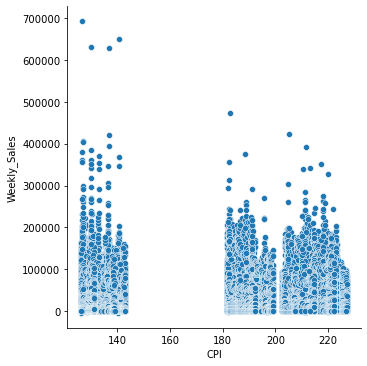

In [49]:
#Effect of CPI on sales
sns.relplot(x="CPI", y="Weekly_Sales", data=sales_full, kind="scatter")
plt.show()

Observation: there is a tendency of negative relationship - the bigger the CPI (higher prices), the smaler sales.

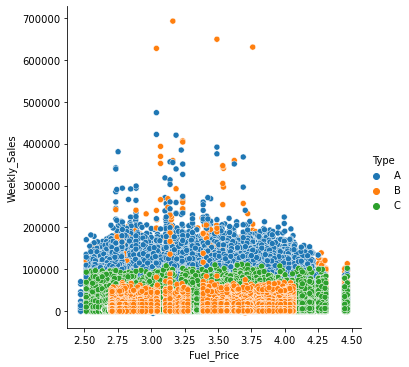

In [50]:
sns.relplot(x="Fuel_Price", y="Weekly_Sales", data=sales_full, hue='Type', kind="scatter")
plt.show()

Observation: Fuel price and sales don't seem to be related. 

### Correlations between all variables

In [51]:
sales_full.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y',
       'MarkDown1_Cat', 'MarkDown2_Cat', 'MarkDown3_Cat', 'MarkDown4_Cat',
       'MarkDown5_Cat', 'Year', 'Month', 'Week_No', 'Nov_Holiday',
       'Before_XMas', 'Nov_Dec'],
      dtype='object')

In [52]:
#selecting a list of columns to correlate. 
#I am taking non nominal, interpretable variables that have quantitative information (e.g., excluded store number)
variables=['Weekly_Sales', 'Dept','IsHoliday', 'Size',
       'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'MarkDown1_Cat', 'MarkDown2_Cat', 'MarkDown3_Cat', 'MarkDown4_Cat',
       'MarkDown5_Cat', 'Nov_Holiday', 'Before_XMas', 'Nov_Dec']

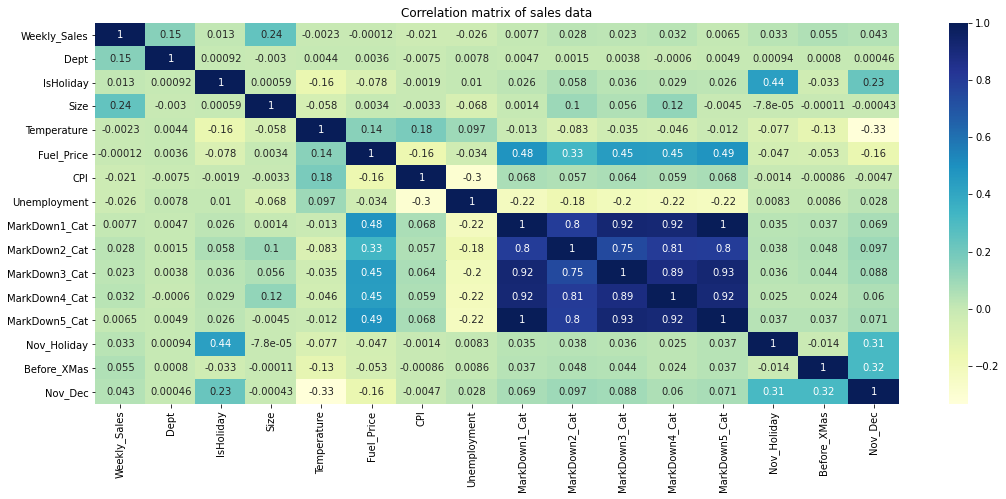

In [53]:
plt.figure(figsize=(18,7))
sns.heatmap(sales_full[variables].corr(), annot = True, cmap="YlGnBu")
plt.title("Correlation matrix of sales data")
plt.show()

In [54]:
#relationships between variables accross stores of different store type
sales_storeA=sales_full[sales_full['Type']=='A']
sales_storeB=sales_full[sales_full['Type']=='B']
sales_storeC=sales_full[sales_full['Type']=='C']

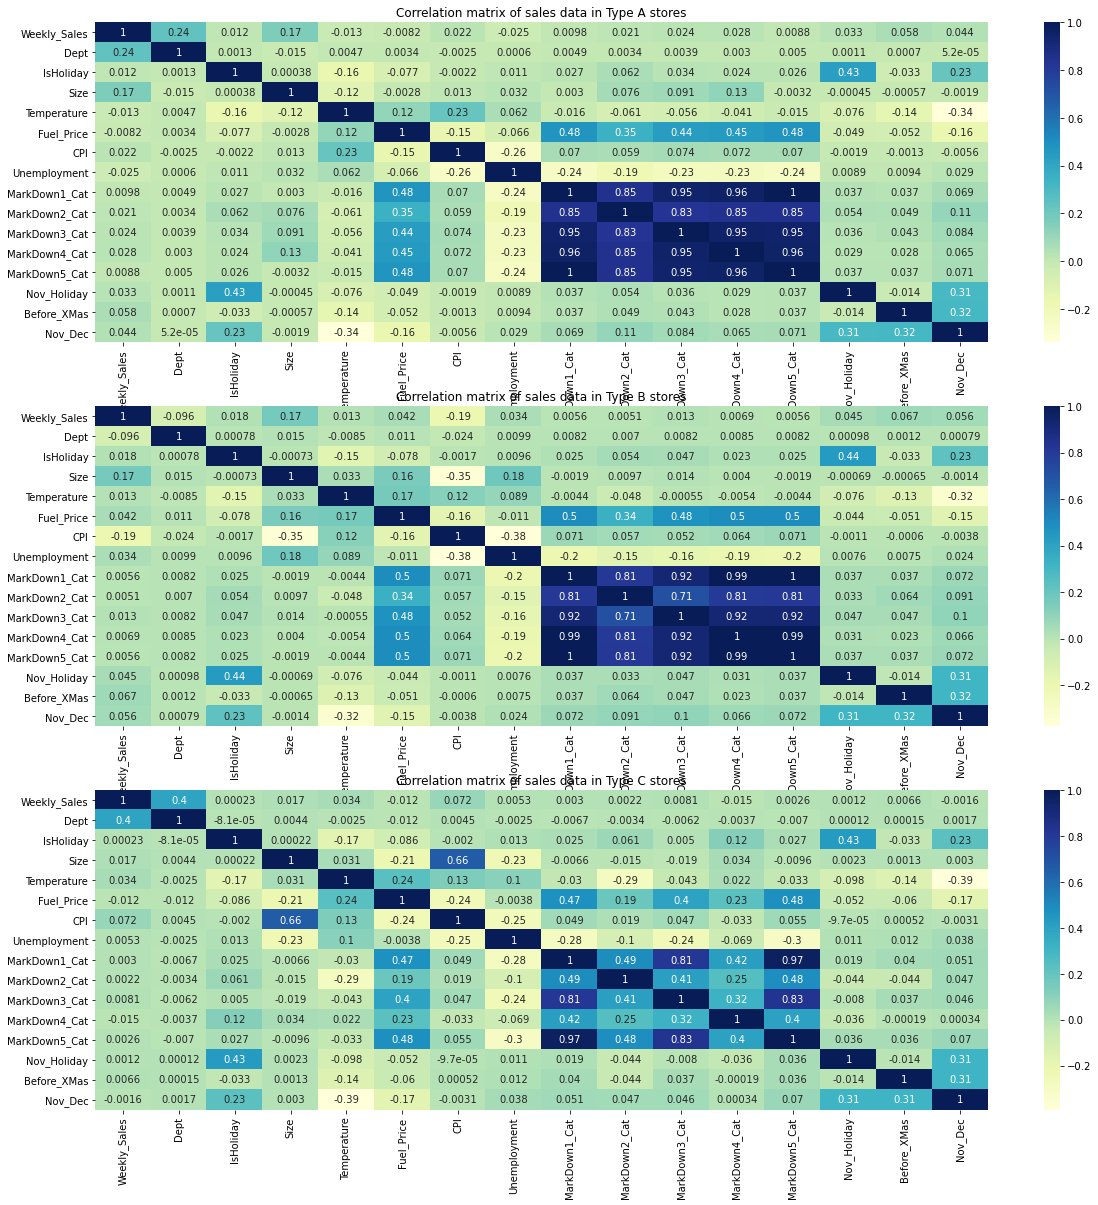

In [55]:
fig, axes=plt.subplots(3,1, figsize=(20,20))
sns.heatmap(sales_storeA[variables].corr(), ax=axes[0], annot = True, cmap="YlGnBu")
axes[0].set_title("Correlation matrix of sales data in Type A stores")
sns.heatmap(sales_storeB[variables].corr(), ax=axes[1], annot = True, cmap="YlGnBu")
axes[1].set_title("Correlation matrix of sales data in Type B stores")
sns.heatmap(sales_storeC[variables].corr(), ax=axes[2], annot = True, cmap="YlGnBu")
axes[2].set_title("Correlation matrix of sales data in Type C stores")
plt.show()

#### Observations: the variables are almost uncorrelated with weekly sales (on general level); highest (but weak) correlation is between sales and store size. The pattern of correlations is similar accross the three types of stores.

### Summary and suggestions

We see the same regularity in sales every year. There is a slight increase of sales on holidays. Increase is visible for Type A and Type B stores but not Type C. In general, sales increase in November and December, mainly on Thanksgiving/Black Friday week and week before Christmas. Top five selling stores are 20, 4, 14, 13, 2. Top five selling departments are 92, 95, 38, 72 and 65. People tend to buy more moderate temperatures in comparison to very cold or hot. 

Plan more staff around highest selling periods (to work with higher number of customers). Also have bigger variety, quantity of products around those periods as well as in high selling stores and departments. Focus more on Type A and Type B stores, since they generate more sales. Examine the stores and the departments that bring most sales.

# 3.Forecasting: Multiple linear regression

In [56]:
#create dummy variables for store type (A, B, or C). 00 means A.
sales_full_dummies=pd.get_dummies(sales_full, drop_first=True)
sales_full_dummies.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,MarkDown4_Cat,MarkDown5_Cat,Year,Month,Week_No,Nov_Holiday,Before_XMas,Nov_Dec,Type_B,Type_C
0,1,1,2010-02-05,24924.50,0,151315,42.31,2.572,0.0,0.0,...,0,0,2010,2,5,0,0,0,0,0
1,1,1,2010-02-12,46039.49,1,151315,38.51,2.548,0.0,0.0,...,0,0,2010,2,6,0,0,0,0,0
2,1,1,2010-02-19,41595.55,0,151315,39.93,2.514,0.0,0.0,...,0,0,2010,2,7,0,0,0,0,0
3,1,1,2010-02-26,19403.54,0,151315,46.63,2.561,0.0,0.0,...,0,0,2010,2,8,0,0,0,0,0
4,1,1,2010-03-05,21827.90,0,151315,46.50,2.625,0.0,0.0,...,0,0,2010,3,9,0,0,0,0,0


In [57]:
#creatinf independent and dependent variables
X=sales_full_dummies[['Dept','IsHoliday', 'Size',
       'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'MarkDown1_Cat', 'MarkDown2_Cat', 'MarkDown3_Cat', 'MarkDown4_Cat',
       'MarkDown5_Cat', 'Month','Nov_Holiday', 'Before_XMas', 'Nov_Dec', 'Type_B', 'Type_C']] 
y=sales_full_dummies['Weekly_Sales']

In [58]:
#divide data into train and test sets. Train 80% cases, test 20% cases
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [59]:
#creating regression object and fitting the model with train data
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [60]:
#r squared for the train data
r_sq_train = reg.score(X_train, y_train)
print(round(r_sq_train,3))

0.089


In [61]:
#getting the rsquared of the test data
r_sq = reg.score(X_test, y_test)
print(round(r_sq,3))

0.092


In [62]:
r_sqAdj=1 - (1-reg.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
print(round(r_sqAdj,3))

0.09


Model explains only 1% of the sales variance. The accuracy is very low.

In [63]:
#saving regression coefficients.
reg_coeff = pd.DataFrame(reg.coef_, X.columns, columns = ['Coefficients'])
reg_coeff

,Coefficients
Dept,109.912497
IsHoliday,420.760230
Size,0.103331
Temperature,73.328559
Fuel_Price,-272.395919
CPI,-23.079665
Unemployment,-466.975443
MarkDown1_Cat,1140.656333
MarkDown2_Cat,-434.623294
MarkDown3_Cat,850.965681


In [64]:
#statistical tests on full dataset (when the model was fitted without an intercept (constant), r squared was 0.39) 
x1 = sm.add_constant(X)
model = sm.OLS(y, x1)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     2312.
Date:                Wed, 09 Jun 2021   Prob (F-statistic):               0.00
Time:                        23:33:04   Log-Likelihood:            -4.8069e+06
No. Observations:              421570   AIC:                         9.614e+06
Df Residuals:                  421551   BIC:                         9.614e+06
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1443.1916    446.226      3.234

In [66]:
predict=reg.predict(X_test)

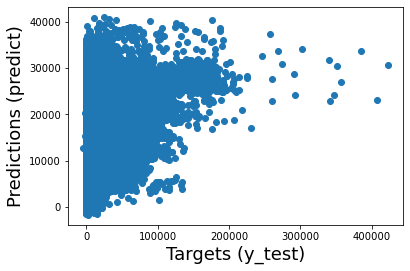

In [67]:
# Create a scatter plot with the test targets and the test predictions
plt.scatter(y_test, predict)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (predict)',size=18)
plt.show()

The prediction is far from target

#### Conclusion: model is significant, but has no accuracy

In [68]:
#Comparison between actual and predicted sales
compare=pd.DataFrame({'Actual_Sales': y_test, 'Predicted_Sales': predict})
compare

,Actual_Sales,Predicted_Sales
272342,50932.42,20793.650051
176581,3196.12,18805.286195
354212,10125.03,3722.926184
281444,3311.26,9411.749627
124208,6335.65,23199.386355
...,...,...
415987,3910.51,12255.862104
193068,9484.13,19180.159093
346600,29354.03,5707.716018
380513,13613.62,23625.085974


In [69]:
#data table with predicted sales values
test=sales_full.merge(compare, left_index=True, right_index=True)
predicted_sales=test[['Store', 'Dept', 'Date', 'Type','Weekly_Sales','Predicted_Sales']]
predicted_sales

,Store,Dept,Date,Type,Weekly_Sales,Predicted_Sales
2,1,1,2010-02-19,A,41595.55,10229.731713
7,1,1,2010-03-26,A,26229.21,10760.196329
11,1,1,2010-04-23,A,16145.35,11616.269761
24,1,1,2010-07-23,A,15360.45,12233.222347
30,1,1,2010-09-03,A,16241.78,11554.866293
...,...,...,...,...,...,...
421524,45,98,2011-12-16,B,853.46,19779.757187
421540,45,98,2012-04-06,B,778.70,18640.045373
421567,45,98,2012-10-12,B,1061.02,17335.006766
421568,45,98,2012-10-19,B,760.01,17490.025328


### Future directions:

Use other type of regression (more suitable for time series data). Predict on store and department level (?combination).